# SMAI Assignment 9

## Akshat Maheshwari (20161024)

In [1]:
# Import required Libraries
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
import random

## Part - 1

In [2]:
anomaly_data = pd.read_csv('Intrusion/data.csv')
anomaly_data = anomaly_data.values
# print(anomaly_data)

In [3]:
def splitXY(data):
    X = np.array(data[:, :-1], dtype=np.float32)
    y = data[:, -1]
    
    return X, y

In [99]:
anomaly_X, anomaly_y = splitXY(anomaly_data)
scaler = MinMaxScaler()
anomaly_X = scaler.fit_transform(anomaly_X)
print(anomaly_X.shape, anomaly_y.shape)

(24998, 29) (24998,)


In [100]:
print(anomaly_X[:5])

[[0.00000000e+00 3.47826093e-01 5.05620676e-07 8.56171682e-05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.74509825e-02 7.05882385e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 7.99999982e-02 5.88235334e-02
  1.00000000e+00 1.00000000e+00 0.00000000e+00 7.00000003e-02
  3.99999991e-02 0.00000000e+00 3.99999991e-02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 5.36231875e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.72549027e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  9.99999978e-03 7.00000003e-02 0.00000000e+00 1.00000000e+00
  3.92156886e-03 0.00000000e+00 7.00000003e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 3.47826093e-01 4.37505946e-07 1.88784883e-03
  0.00000000e+00 0.00000000e+00 0.

In [20]:
num_inps = anomaly_X.shape[1]
num_hid1, num_hid2, num_hid3 = 14, 14, 14
num_outs = num_inps

print(num_inps, num_hid1, num_hid2, num_hid3, num_outs)

29 14 14 14 29


In [7]:
alpha = 0.001
act_func = tf.nn.relu

In [8]:
X_an = tf.placeholder(tf.float32, shape=[None, num_inps])
initializer = tf.variance_scaling_initializer()

In [9]:
w1 = tf.Variable(initializer([num_inps, num_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer([num_hid1, num_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer([num_hid2, num_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer([num_hid3, num_outs]), dtype=tf.float32)

In [10]:
b1 = tf.Variable(tf.zeros(num_hid1))
b2 = tf.Variable(tf.zeros(num_hid2))
b3 = tf.Variable(tf.zeros(num_hid3))
b4 = tf.Variable(tf.zeros(num_outs))

In [11]:
hid_layer1 = act_func(tf.matmul(X_an, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
out_layer = act_func(tf.matmul(hid_layer3, w4) + b4)

In [14]:
loss = tf.reduce_mean(tf.square(out_layer - X_an))
optimizer = tf.train.AdamOptimizer(alpha)
train = optimizer.minimize(loss)

In [15]:
init=tf.global_variables_initializer()

num_epochs = 200
batch_size = 200

In [27]:
epochs = []
losses = []

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        num_batches = math.ceil(anomaly_X.shape[0] / batch_size)
#         print(num_batches)
        for iteration in range(num_batches):
            start_ind = iteration * batch_size
            end_ind = min(anomaly_X.shape[0], (iteration+1)*batch_size)
            X_batch = anomaly_X[start_ind : end_ind]
            sess.run(train, feed_dict={X_an:X_batch})
            
        train_loss=loss.eval(feed_dict={X_an:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        
        epochs.append(epoch)
        losses.append(train_loss)
        
    X_h1 = tf.matmul(anomaly_X, w1) + b1
    X_h2 = tf.matmul(X_h1, w2) + b2
    X_train = tf.matmul(X_h2, w3) + b3

    X_train = X_train.eval()

epoch 0 loss 0.029237797483801842
epoch 1 loss 0.011724152602255344
epoch 2 loss 0.009188726544380188
epoch 3 loss 0.007728132419288158
epoch 4 loss 0.007164907641708851
epoch 5 loss 0.006817329209297895
epoch 6 loss 0.006492323242127895
epoch 7 loss 0.006194473709911108
epoch 8 loss 0.005979450419545174
epoch 9 loss 0.005805575754493475
epoch 10 loss 0.005662428680807352
epoch 11 loss 0.00531596876680851
epoch 12 loss 0.005164641886949539
epoch 13 loss 0.005072454456239939
epoch 14 loss 0.005004557315260172
epoch 15 loss 0.004947835113853216
epoch 16 loss 0.004899090621620417
epoch 17 loss 0.0048622507601976395
epoch 18 loss 0.004833553452044725
epoch 19 loss 0.004809196572750807
epoch 20 loss 0.004790754988789558
epoch 21 loss 0.0047727287746965885
epoch 22 loss 0.004758051596581936
epoch 23 loss 0.004746369551867247
epoch 24 loss 0.004729994107037783
epoch 25 loss 0.004713833332061768
epoch 26 loss 0.004698442295193672
epoch 27 loss 0.004685098771005869
epoch 28 loss 0.0046718954108

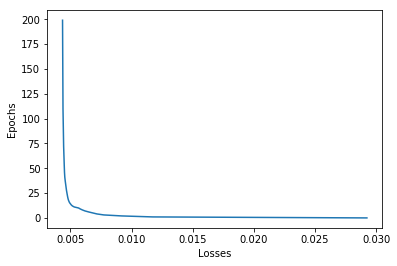

In [29]:
plt.figure()
plt.plot(losses, epochs)
plt.xlabel('Losses')
plt.ylabel('Epochs')
plt.show()

In [30]:
# print(anomaly_X.shape)
# print(w1.shape)

# X_h1 = tf.matmul(anomaly_X, w1) + b1
# X_h2 = tf.matmul(X_h1, w2) + b2
# X_train = tf.matmul(X_h2, w3) + b3

# X_train = X_train.eval()

print(X_train.shape)
print(anomaly_y.shape)

# anomaly_y.reshape(24998, 1)

train_l = int(0.6*len(X_train))
val_l = int(0.8*len(X_train))

X_trainf = np.array(X_train[:train_l])
y_trainf = np.array(anomaly_y[:train_l])
X_val = np.array(X_train[train_l:val_l])
y_val = np.array(anomaly_y[train_l:val_l])
X_test = np.array(X_train[val_l:])
y_test = np.array(anomaly_y[val_l:])

(24998, 14)
(24998,)


In [31]:
def near_centroid(k_vals, entries):
    min_dist = sys.maxsize
    result = -1

    for j in range(len(k_vals)):
        temp = 0
        for i in range(len(k_vals[j])):
            temp += (k_vals[j][i] - entries[i])**2

        temp = math.sqrt(temp)

        if temp < min_dist:
            min_dist = temp
            result = j

    return result

def new_means(dataset):
    mean_vals = []
    dataset = np.array(dataset)
    
    for i in range(len(dataset[0])):
        mean_vals.append(np.mean(dataset[:, i]))

    return mean_vals

In [32]:
Y = anomaly_y
X_reg = X_train

k = 5

centroids, done_k = [], []

while len(centroids)<k:
    temp = random.randint(1, len(X_reg))
    if temp not in done_k:
        centroids.append(X_reg[temp])
        done_k.append(temp)

z = 0
purity = []

maxP = 0

while True and z<10:
    corresp_k = []
    for row in X_reg:
        corresp_k.append(near_centroid(centroids, row))

    new_k = []

    # print(corresp_k)

    for i in range(k):
        arr = []
        for j in range(len(X_reg)):
            # print(corresp_k[j])
            if corresp_k[j] == i:
                arr.append(X_reg[j])
        new_k.append(new_means(arr))

    flag = 0

    for i in range(k):
        for j in range(len(centroids[i])):
            if centroids[i][j] != new_k[i][j]:
                flag = 1
                break
        if flag:
            break

    centroids.clear()
    centroids = new_k

    purity.clear()
    for i in range(k):
        check_arr = []
        for j in range(len(corresp_k)):
            if corresp_k[j] == i:
                check_arr.append(Y[j])

        unique_arr = set(check_arr)
        max_count = 0
        for label in unique_arr:
            max_count = max(max_count, check_arr.count(label))

        purity.append(max_count)

    print(np.sum(purity) / len(X_reg))

    if maxP < np.sum(purity)/len(X_reg):
        maxP = np.sum(purity)/len(X_reg)

    if flag==0:
        break

    print(z)
    z += 1

print(maxP)

0.7849027922233779
0
0.7973837907032563
1
0.8101448115849268
2
0.8193455476438115
3
0.824305944475558
4
0.8269861588927114
5
0.8293463477078167
6
0.8310664853188255
7
0.8318265461236899
8
0.8325066005280423
9
0.8325066005280423


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [34]:
gmm = GaussianMixture(n_components=5, covariance_type='full', max_iter=1000, init_params='kmeans')
predictions = gmm.fit_predict(X_reg)

purity = []
unique_preds = set(predictions)

for preds in unique_preds:
    check_arr = []
    for j in range(len(X_reg)):
        if predictions[j] == preds:
            check_arr.append(Y[j])

    unique_arr = set(check_arr)
    max_count = 0
    for label in unique_arr:
        max_count = max(max_count, check_arr.count(label))

    purity.append(max_count)

print(np.sum(purity) / len(X_reg))

0.7918633490679254


In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
Hierrachical_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')

X_reg = X_train

predictions = Hierrachical_model.fit_predict(X_reg)

purity = []
unique_preds = set(predictions)

for preds in unique_preds:
    check_arr = []
    for j in range(len(X_reg)):
        if predictions[j] == preds:
            check_arr.append(Y[j])

    unique_arr = set(check_arr)
    max_count = 0
    for label in unique_arr:
        max_count = max(max_count, check_arr.count(label))

    purity.append(max_count)

print(np.sum(purity) / len(X_reg))

0.5348427874229938


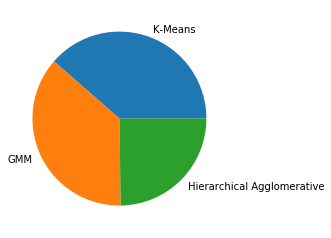

In [96]:
plt.pie([maxP, 0.7918633490679254, 0.5348427874229938], labels=["K-Means", "GMM", "Hierarchical Agglomerative"])
plt.show()

In this part, I am using **tensorflow** library for all my autoencoder work, because I have already implemented the neural networks from scratch in 2 previous assignments, and in the last assignment, we even were taught how to use the tensorflow and Keras libraries.

In the other parts of the assignment, I have used the previous functions that I had already built in my previous assignment. I am directly using those functions for getting the results.

For the other parts for the encoder, we just need to change the activation function in the hidden layer 2, rest all the code will remain same. So, instead of the ReLU activation function (which is a linear activation function), we can use Sigmoid or Tanh (which are non-linear activation functions).

## Part - 2 (Handwritten Digits)

In [37]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.kde import KernelDensity
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


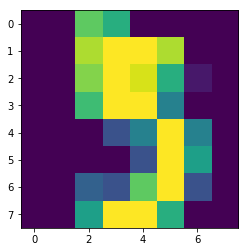

X_shape = (1797, 64)
y_shape = (1797,)


In [38]:
digits = load_digits()
X_digs = digits.data
y_digs = digits.target

print(X_digs)

mat = X_digs[5].reshape(8, 8)
plt.imshow(mat)
plt.show()


print("X_shape =", X_digs.shape)
print("y_shape =", y_digs.shape)

In [39]:
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    X_cov = np.cov(X_std.T)

    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(X_digs)

In [40]:
eigenvals, eigenvecs = np.linalg.eig(X_cov)

print("Eigenvals shape :", eigenvals.shape)
print("Eigenvecs shape :", eigenvecs.shape)

Eigenvals shape : (64,)
Eigenvecs shape : (64, 64)


In [41]:
lam_sum = sum(eigenvals)
explained_variance = [(lam_k/lam_sum) for lam_k in sorted(eigenvals, reverse=True)]

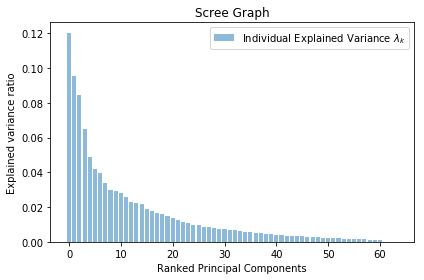

In [42]:
plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='Individual Explained Variance $\lambda_{k}$')

plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph")

plt.legend(loc='best')
plt.tight_layout()

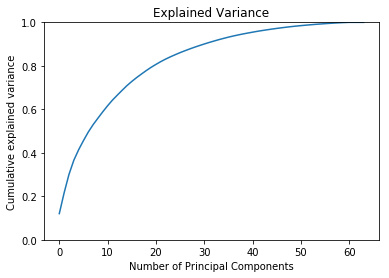

In [43]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.plot(np.cumsum(explained_variance))

ax1.set_ylim([0,1.0])

ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('Explained Variance')

plt.show()

### First Random Number between 15 and 41

In [44]:
n1 = 16
print(n1)

16


In [46]:
X_std1 = np.array(X_std)
y1 = np.array(y_digs)
pca_data1 = PCA(n_components=n1)
pca_data1 = pca_data1.fit(X_std1).transform(X_std1)
# pca.components_ = pca.components_.T

print(pca_data1.shape)

(1797, 16)


In [47]:
bandwidths = 10 * np.linspace(-1 , 1, 20)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 500, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}]

# clf = GridSearchCV(SVC(), {'bandwidth': bandwidths}, cv=5)
clf = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=5)
clf.fit(pca_data1, y1)

# clf.score_samples(pca, y1)
# print("Best parameters set found on development set:")
# print()
# print(clf.best_params_)

bandwidth = clf.best_params_['bandwidth']

print(bandwidth)

0.5263157894736836


/home/akshat14714/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde.fit(pca_data1)

print(kde)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


##### Gaussian Density Estimation

In [49]:
from sklearn.mixture import GaussianMixture

Optimal Number of Components for GMM = 17


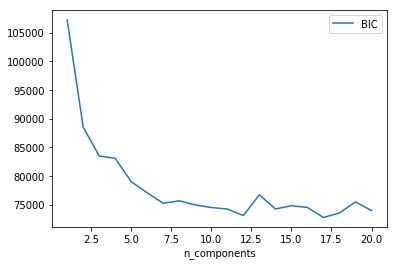

In [50]:
n_comps = np.arange(1, 21)

clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full').fit(pca_data1) for n in n_comps]

plt.plot(n_comps, [m.bic(pca_data1) for m in clf_gauss_models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

bics = [m.bic(pca_data1) for m in clf_gauss_models]

lowest_bic_ind = bics.index(min(bics))

optimal_n_comps = n_comps[lowest_bic_ind]

print("Optimal Number of Components for GMM =", optimal_n_comps)

#### Data Generation Using Gaussian Density Estimator

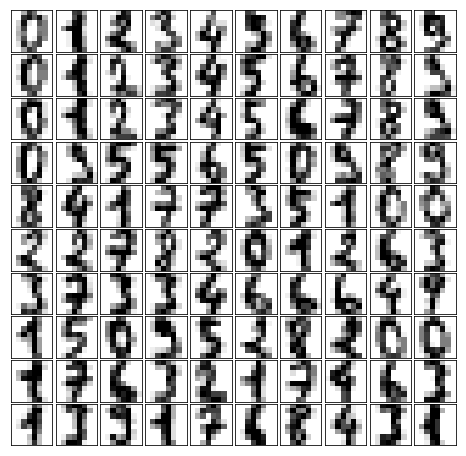

In [51]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [52]:
pca1 = PCA(n_components=n1, whiten=True)
data1 = pca1.fit_transform(digits.data)
print(data1.shape)

(1797, 16)


In [53]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde_model.fit(data1)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [54]:
data1k_new = kde_model.sample(n_samples=100, random_state=0)
print(data1k_new.shape)
print(type(data1k_new))

(100, 16)
<class 'numpy.ndarray'>


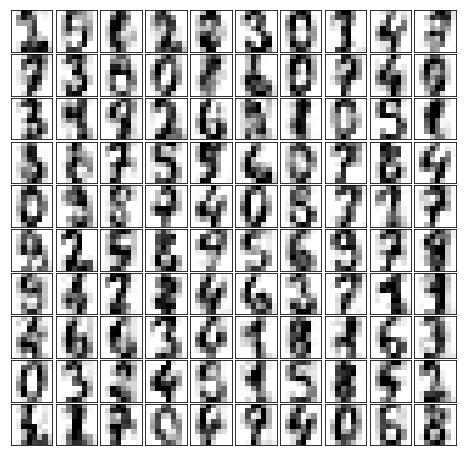

In [55]:
digits1k_new = pca1.inverse_transform(data1k_new)
plot_digits(digits1k_new)

200


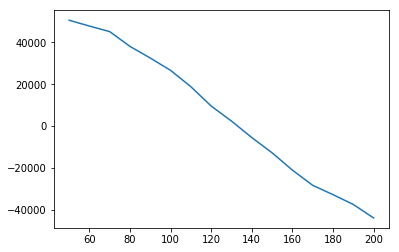

In [56]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data1).aic(data1) for model in models]

min_aics_ind = aics.index(min(aics))

min_n_comp = n_components[min_aics_ind]

plt.plot(n_components, aics)

print(min_n_comp)

In [57]:
gmm_model = GaussianMixture(min_n_comp, covariance_type='full', random_state=0)
gmm_model.fit(data1)
print(gmm_model.converged_)

True


In [58]:
X1_new, y1_new = gmm_model.sample(100)
print(X1_new.shape)
print(type(X1_new))

(100, 16)
<class 'numpy.ndarray'>


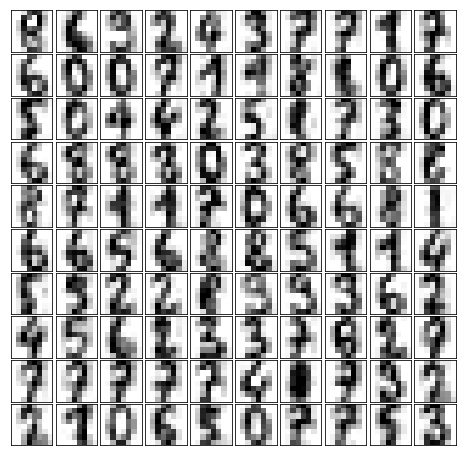

In [59]:
digits1_new = pca1.inverse_transform(X1_new)
plot_digits(digits1_new)

### Second Random Number between 15 and 41

In [60]:
n2 = 28
print(n2)

28


In [65]:
X_std2 = np.array(X_std)
y2= np.array(y_digs)
pca_data2 = PCA(n_components=n2)
pca_data2 = pca_data2.fit(X_std2).transform(X_std2)
# pca.components_ = pca.components_.T

print(pca_data2.shape)

(1797, 28)


In [66]:
bandwidths = 10 * np.linspace(-1 , 1, 20)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 500, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}]

# clf = GridSearchCV(SVC(), {'bandwidth': bandwidths}, cv=5)
clf = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=5)
clf.fit(pca_data2, y2)

# clf.score_samples(pca, y1)
# print("Best parameters set found on development set:")
# print()
# print(clf.best_params_)

bandwidth = clf.best_params_['bandwidth']

print(bandwidth)

0.5263157894736836


/home/akshat14714/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde.fit(pca_data2)

print(kde)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


##### Gaussian Density Estimation

Optimal Number of Components for GMM = 8


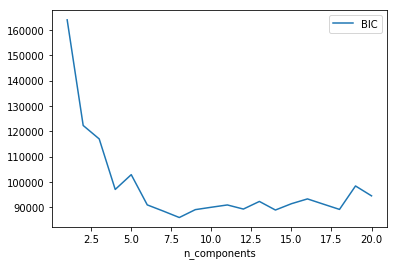

In [68]:
n_comps = np.arange(1, 21)

clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full').fit(pca_data2) for n in n_comps]

plt.plot(n_comps, [m.bic(pca_data2) for m in clf_gauss_models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

bics = [m.bic(pca_data2) for m in clf_gauss_models]

lowest_bic_ind = bics.index(min(bics))

optimal_n_comps = n_comps[lowest_bic_ind]

print("Optimal Number of Components for GMM =", optimal_n_comps)

#### Data Generation Using Gaussian Density Estimator

In [69]:
pca2 = PCA(n_components=n2, whiten=True)
data2 = pca2.fit_transform(digits.data)
print(data2.shape)

(1797, 28)


In [70]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde_model.fit(data2)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [71]:
data2k_new = kde_model.sample(n_samples=100, random_state=0)
print(data2k_new.shape)
print(type(data2k_new))

(100, 28)
<class 'numpy.ndarray'>


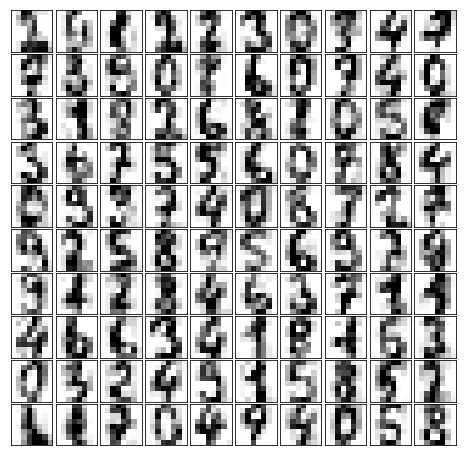

In [72]:
digits2k_new = pca2.inverse_transform(data2k_new)
plot_digits(digits2k_new)

200


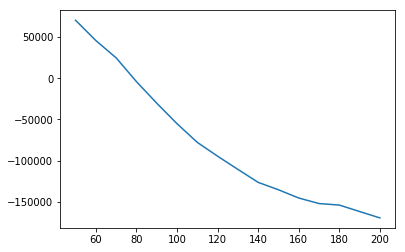

In [73]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data2).aic(data2) for model in models]

min_aics_ind = aics.index(min(aics))

min_n_comp = n_components[min_aics_ind]

plt.plot(n_components, aics)

print(min_n_comp)

In [74]:
gmm_model = GaussianMixture(min_n_comp, covariance_type='full', random_state=0)
gmm_model.fit(data2)
print(gmm_model.converged_)

True


In [75]:
X2_new, y2_new = gmm_model.sample(100)
print(X2_new.shape)
print(type(X2_new))

(100, 28)
<class 'numpy.ndarray'>


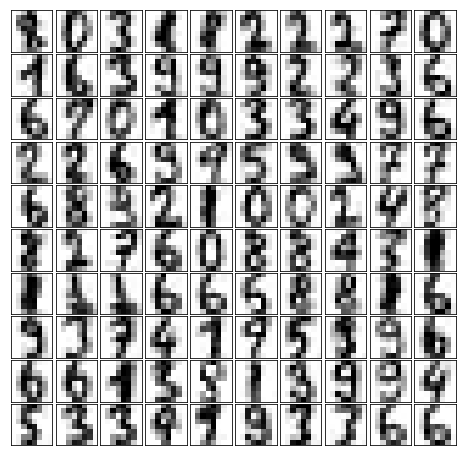

In [76]:
digits2_new = pca2.inverse_transform(X2_new)
plot_digits(digits2_new)

### Third Random Number between 15 and 41

In [77]:
n3 = 40
print(n3)

40


In [79]:
X_std3 = np.array(X_std)
y3 = np.array(y_digs)
pca_data3 = PCA(n_components=n3)
pca_data3 = pca_data3.fit(X_std3).transform(X_std3)
# pca.components_ = pca.components_.T

print(pca_data3.shape)

(1797, 40)


In [80]:
bandwidths = 10 * np.linspace(-1 , 1, 20)
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 500, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 500, 1000]}]

# clf = GridSearchCV(SVC(), {'bandwidth': bandwidths}, cv=5)
clf = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=5)
clf.fit(pca_data3, y3)

# clf.score_samples(pca, y1)
# print("Best parameters set found on development set:")
# print()
# print(clf.best_params_)

bandwidth = clf.best_params_['bandwidth']

print(bandwidth)

0.5263157894736836


/home/akshat14714/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [81]:
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde.fit(pca_data1)

print(kde)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


##### Gaussian Density Estimation

Optimal Number of Components for GMM = 9


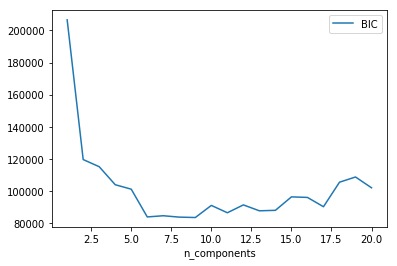

In [82]:
n_comps = np.arange(1, 21)

clf_gauss_models = [GaussianMixture(n_components=n, covariance_type='full').fit(pca_data3) for n in n_comps]

plt.plot(n_comps, [m.bic(pca_data3) for m in clf_gauss_models], label='BIC')
plt.legend(loc='best')
plt.xlabel('n_components')

bics = [m.bic(pca_data3) for m in clf_gauss_models]

lowest_bic_ind = bics.index(min(bics))

optimal_n_comps = n_comps[lowest_bic_ind]

print("Optimal Number of Components for GMM =", optimal_n_comps)

#### Data Generation Using Gaussian Density Estimator

In [83]:
pca3 = PCA(n_components=n3, whiten=True)
data3 = pca3.fit_transform(digits.data)
print(data3.shape)

(1797, 40)


In [84]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde_model.fit(data3)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.5263157894736836,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

In [85]:
data3k_new = kde_model.sample(n_samples=100, random_state=0)
print(data3k_new.shape)
print(type(data3k_new))

(100, 40)
<class 'numpy.ndarray'>


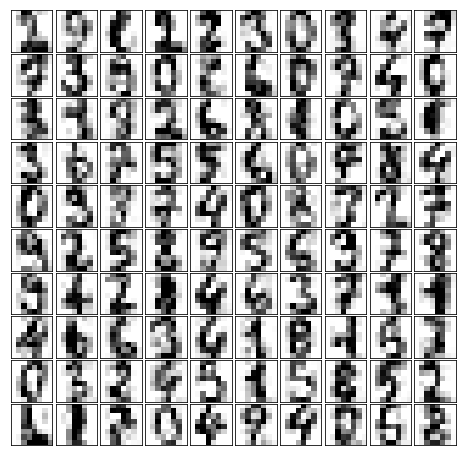

In [86]:
digits3k_new = pca3.inverse_transform(data3k_new)
plot_digits(digits3k_new)

140


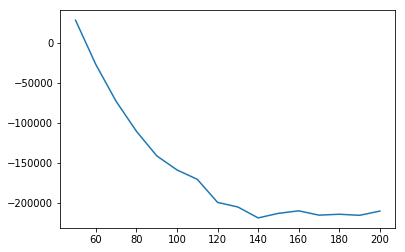

In [89]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]
aics = [model.fit(data3).aic(data3) for model in models]

min_aics_ind = aics.index(min(aics))

min_n_comp = n_components[min_aics_ind]

plt.plot(n_components, aics)

print(min_n_comp)

In [90]:
gmm_model = GaussianMixture(min_n_comp, covariance_type='full', random_state=0)
gmm_model.fit(data3)
print(gmm_model.converged_)

True


In [91]:
X3_new, y3_new = gmm_model.sample(100)
print(X3_new.shape)
print(type(X3_new))

(100, 40)
<class 'numpy.ndarray'>


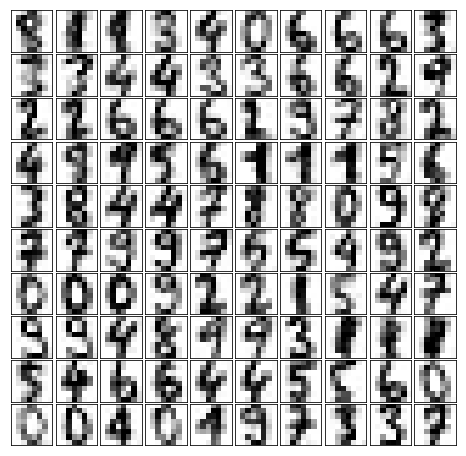

In [94]:
digits3_new = pca3.inverse_transform(X3_new)
plot_digits(digits3_new)

In this part, when I tried sampling 48 nearby points, I was getting an out of bound and IndexError. So, I sampled 100 points, and if we want the nearest 48 points, we can just take the initial 48 samples so that we get the nearest 48 samples.

Other than that, I have completely used the in-built functions for all my calculations and model building. I browsed through the internet and used all the library functions that are used for the given operations.